# Flattened dT analysis
Full combinatorics

In [6]:
# System tools  
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Python stack 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

# Internal modules 
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load

# pyutils 
from pyutils.pyplot import Plot
plotter = Plot() # just use this for styles

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Load data

In [7]:
!ls -ltrh ../../output/dt/

total 0
drwxr-sr-x  3 sgrant  staff    96B Dec  2 13:56 cosmic
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:00 test
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:10 a


In [8]:
!ls -ltrh ../../output/dt/
!ls -ltrh ../../output/dt/a/data
# !ls -ltrh ../../output/dt/a/data/

total 0
drwxr-sr-x  3 sgrant  staff    96B Dec  2 13:56 cosmic
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:00 test
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:10 a
total 0
drwxr-sr-x  6 sgrant  staff   192B Dec  2 14:14 CRY_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 14:18 CRY_mix2BB_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:37 CE_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:39 CE_mix_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:39 CE_mix2bb_onspill-LH_aw
total 0
drwxr-sr-x  6 sgrant  staff   192B Dec  2 14:14 CRY_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 14:18 CRY_mix2BB_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:37 CE_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:39 CE_mix_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  2 15:39 CE_mix2bb_onspill-LH_aw


In [9]:
run = "a"
base_in_path = Path(f"../../output/dt/{run}/data/")

# Load both test datasets
cry_path = base_in_path / "CRY_onspill-LH_aw/"
ce_mix2bb_path = base_in_path / "CE_mix2BB_onspill-LH_aw/"

print(f"Loading CRY data from: {cry_path}")
cry_data = Load(in_path=cry_path).load_pkl()["events"]

print(f"Loading CE Mix2BB data from: {ce_mix2bb_path}")
ce_mix_data = Load(in_path=ce_mix2bb_path).load_pkl()["events"]

print(f"CRY events: {len(cry_data)}")
print(f"CE mix2BB events: {len(ce_mix_data)}")

Loading CRY data from: ../../output/dt/a/data/CRY_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/a/data/CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/a/data/CRY_onspill-LH_aw/results.pkl
Loading CE Mix2BB data from: ../../output/dt/a/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/a/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/a/data/CE_mix2BB_onspill-LH_aw/results.pkl
CRY events: 23727
CE mix2BB events: 2139827


In [10]:
## Add duration
cry_data["duration"] = cry_data["timeEnd"] - cry_data["timeStart"]
ce_mix_data["duration"] = ce_mix_data["timeEnd"] - ce_mix_data["timeStart"]

In [11]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(cry_data, n_events=2)
printer.print_n_events(ce_mix_data, n_events=2)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 2 event(s)...

-------------------------------------------------------------------------------------
event: 262848.0
subrun: 86.0
run: 1202.0
dT: 98.15043637708982
crv_x: -1672.1048583984375
crv_y: 2707.981201171875
crv_z: 3397.87939453125
PEs: 855.2965087890625
nHits: 16.0
nLayers: 4.0
angle: 0.35403910279273987
timeStart: 688.544189453125
timeEnd: 788.544189453125
crv_time: 670.452392578125
sector: 3.0
PEs_per_hit: 53.456031799316406
t0: 768.6028289552148
d0: 3.3119900226593018
tanDip: 0.530070424079895
maxr: 588.1376342773438
mom_mag: 102.95211029052734
duration: 100.0
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
event: 454893.0
subrun: 171.0
run: 1202.0
dT: 38.35566293459647
crv_x: -1440.86376953125
crv_y: 2710.227783203125
crv_z: -5999.884765625
PEs: 1151.767578125



## Convert to DataFrames

In [88]:
# Convert awkward arrays to DataFrame
df_cry = ak.to_dataframe(cry_data)
df_ce_mix = ak.to_dataframe(ce_mix_data)

## Time start/end cut 

reoptimisation for MDC2020aw

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/a/h1_2x2_start_end_time.png
	Wrote ../../output/images/dt/a/h1_2x2_start_end_time.png


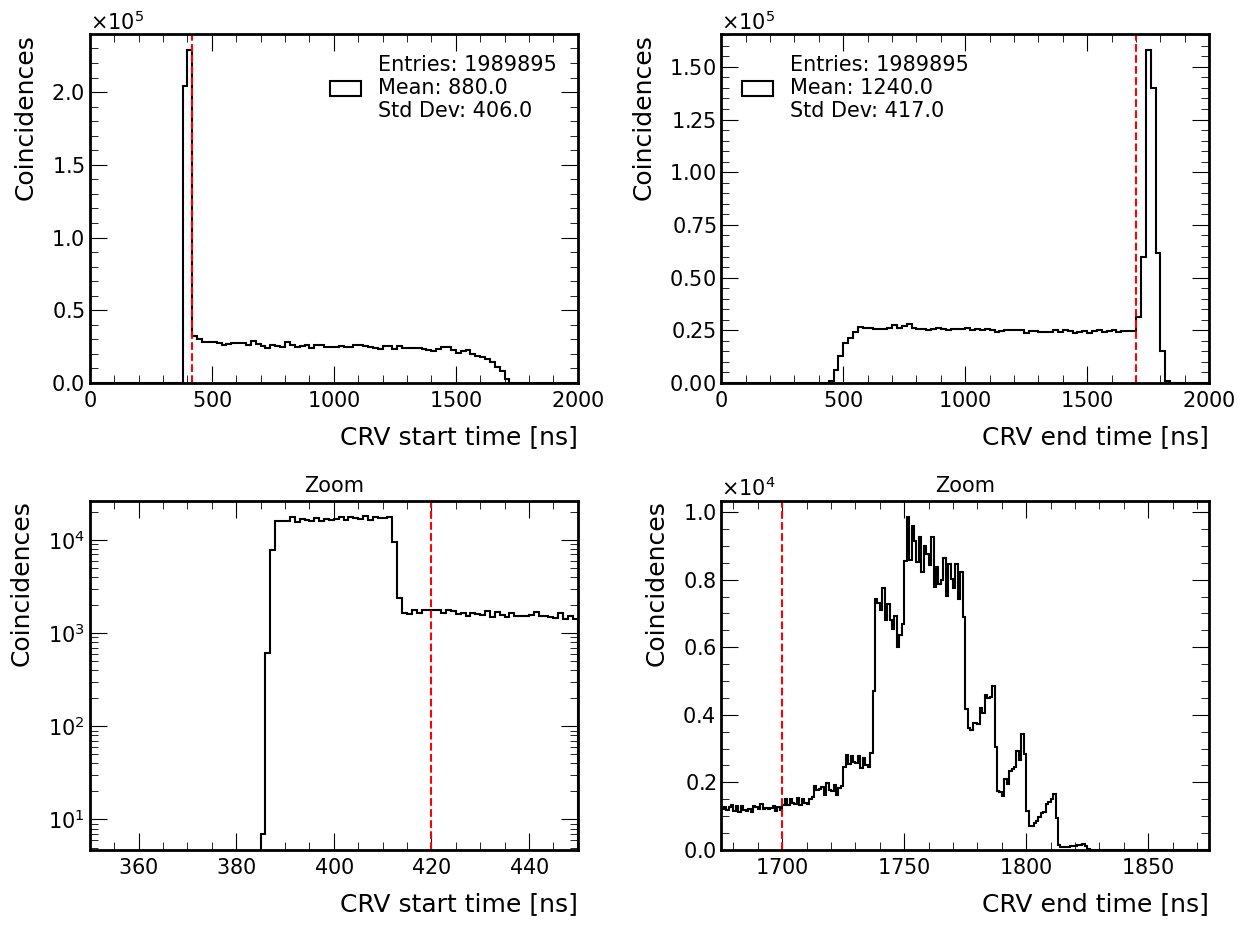

In [150]:
from pyutils.pyplot import Plot 

plotter = Plot()
fig, ax = plt.subplots(2, 2, figsize=(2*6.4, 2*4.8))

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,0],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,1],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
   
)

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=350,
    xmax=450,
    show=False,
    ax=ax[1,0],
    log_y=True,
    title="Zoom",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False   
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=200,  
    xmin=1675,
    xmax=1875,
    show=False,
    ax=ax[1,1],
    # log_y=True,
    title="Zoom",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False     
)

ax[0,0].axvline(420, linestyle="--")
ax[0,1].axvline(1700, linestyle="--")

ax[1,0].axvline(420, linestyle="--")
ax[1,1].axvline(1700, linestyle="--")


plt.tight_layout()
img_base_path = Path(f"../../output/images/dt/a/")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name = img_base_path / "h1_2x2_start_end_time.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

	Wrote ../../output/images/dt/a/h1o_1x2_start_end_time_cut.png


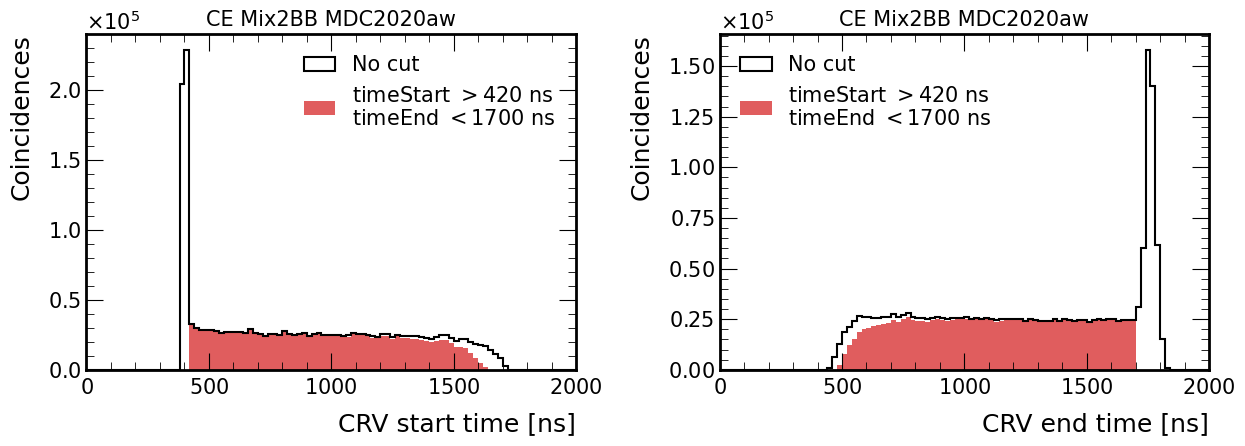

In [151]:
# Apply cut 
condition = ((df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700))

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles = {
    "No cut" : {
        "color": "black",
        "linestyle": "-"
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : {
        "color": "red",
        "histtype": "stepfilled",
        "alpha": 0.75
    },  

}

styles = {
    "No cut": {
        "color": "black",
        "linestyle": "-",
        "linewidth": 1.5,  # Make baseline more visible
        "zorder": 3  # Draw on top
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns": {
        "color": "#d62728",  # Slightly better red
        "histtype": "stepfilled",
        "alpha": 0.75,  # Slightly more transparent
        "edgecolor": "darkred",  # Add edge for definition
        "linewidth": 1.0,
        "zorder": 2
    },  
}

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeStart"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeStart"][condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeEnd"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeEnd"][condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[1],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
)

plt.tight_layout()

out_name = img_base_path / "h1o_1x2_start_end_time_cut.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

In [169]:
def get_start_end_cut_impact(df, condition, metric, dt_window=(-25, 150)):
    """
    Calculate deadtime or efficiency before and after applying a start/endtime condition.
    Returns a summary DataFrame with statistics.
    """
    dt_min, dt_max = dt_window

    def get_veto_stats(data, label):
        # Find unique (event, subrun) pairs
        total_events = set(zip(data['event'], data['subrun']))
        # Find events with at least one dT in window
        in_window = (data['dT'] >= dt_min) & (data['dT'] <= dt_max)
        passing_events = set(zip(data.loc[in_window, 'event'], data.loc[in_window, 'subrun']))
        fraction = len(passing_events) / len(total_events) if len(total_events) > 0 else 0
        return {
            'condition': label,
            'total_events': len(total_events),
            'passing_events': len(passing_events),
            f'{metric}_percent': fraction * 100
        }

    # Calculate statistics before and after cut
    stats_before = get_veto_stats(df, 'Before cut')
    stats_after = get_veto_stats(df[condition], 'After cut')

    # Add change row
    change = {
        'condition': 'Change',
        'total_events': stats_after['total_events'] - stats_before['total_events'],
        'passing_events': stats_after['passing_events'] - stats_before['passing_events'],
        f'{metric}_percent': stats_after[f'{metric}_percent'] - stats_before[f'{metric}_percent']
    }

    # Create summary DataFrame
    summary = pd.DataFrame([stats_before, stats_after, change])
    # print(f"Summary for metric: {metric}")
    # display(summary)
    return summary

# Example usage after function definition
condition1 = (df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700)
summary_ce_mix_1 = get_start_end_cut_impact(df_ce_mix, condition1, metric="deadtime")
summary_cry_1  = get_start_end_cut_impact(df_cry, condition1, metric="efficiency")
print("Condition 1: timeStart > 420 ns & timeEnd < 1700 ns")
print("="*70)
display(summary_ce_mix_1)
display(summary_cry_1)

Condition 1: timeStart > 420 ns & timeEnd < 1700 ns


,condition,total_events,passing_events,deadtime_percent
0,Before cut,578372,179144,30.973837
1,After cut,403809,149941,37.131664
2,Change,-174563,-29203,6.157827


,condition,total_events,passing_events,efficiency_percent
0,Before cut,20087,20077,99.950217
1,After cut,13786,13777,99.934716
2,Change,-6301,-6300,-0.015500


## Apply start/end time cut 

In [156]:
condition = (df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700)

df_ce_mix_cut = df_ce_mix[condition]
df_cry_cut = df_cry[condition]

In [153]:
# fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# styles = {
#     "No cut": {
#         "color": "black",
#         "linestyle": "-",
#         "linewidth": 1.5,
#     },
#     "timeStart $>420$ ns\ntimeEnd $<1700$ ns": {
#         "color": "#d62728",  # Red
#         "histtype": "stepfilled",
#         "alpha": 0.75,  # More transparent for overlap
#         "edgecolor": "darkred",
#         "linewidth": 1.0,
#     },
#     "timeStart $>450$ ns\ntimeEnd $<1690$ ns": {
#         "color": "#1f77b4",  # Blue
#         "histtype": "stepfilled",
#         "alpha": 0.85,  # More transparent for overlap
#         "edgecolor": "darkblue",
#         "linewidth": 1.0,
#     },
# }

# plotter.plot_1D_overlay(
#     {
#         "No cut": df_ce_mix["timeStart"],
#         "timeStart $>420$ ns\ntimeEnd $<1700$ ns": df_ce_mix["timeStart"][condition1],
#         "timeStart $>450$ ns\ntimeEnd $<1690$ ns": df_ce_mix["timeStart"][condition2]
#     },
#     nbins=100,  
#     xmin=0,
#     xmax=2000,
#     show=False,
#     ax=ax[0],
#     styles=styles,
#     title="CE Mix2BB MDC2020aw",
#     xlabel="CRV start time [ns]", 
#     ylabel="Coincidences",
#     norm_by_area=False     
# )

# plotter.plot_1D_overlay(
#     {
#         "No cut": df_ce_mix["timeEnd"],
#         "timeStart $>420$ ns\ntimeEnd $<1700$ ns": df_ce_mix["timeEnd"][condition1],
#         "timeStart $>450$ ns\ntimeEnd $<1690$ ns": df_ce_mix["timeEnd"][condition2]
#     },
#     nbins=100,  
#     xmin=0,
#     xmax=2000,
#     show=False,
#     ax=ax[1],
#     styles=styles,
#     title="CE Mix2BB MDC2020aw",
#     xlabel="CRV end time [ns]", 
#     ylabel="Coincidences",
#     norm_by_area=False
# )

# # Adjust legend to fit better
# for axis in ax:
#     axis.legend(loc="best")

# plt.tight_layout()

# out_name = img_base_path / "h1o_1x2_start_end_time_cut_comparison.png" 
# plt.savefig(out_name, dpi=300) 

# print(f"\tWrote {out_name}")
# plt.show()


## Scan dT

In [157]:
# Use ALL coincidences (no selection)
print(f"Using all coincidences:")
print(f"CRY: {len(df_cry_cut):,} coincidences")
print(f"Mix2BB: {len(df_ce_mix_cut):,} coincidences")
print(f"\nWill check if event is vetoed = has ANY coincidence in timing window")

Using all coincidences:
CRY: 15,543 coincidences
Mix2BB: 1,406,582 coincidences

Will check if event is vetoed = has ANY coincidence in timing window


In [170]:
def apply_dt_cut(df, dt_min, dt_max):
    """
    Apply dT timing window cut on event level.
    
    Fraction of events that pass
    """
    # Find rows where dT is within the window
    in_window = (df['dT'] >= dt_min) & (df['dT'] <= dt_max)
    
    # Get unique (event, subrun) pairs that have at least one dT in window
    pass_events = set(zip(df.loc[in_window, 'event'], df.loc[in_window, 'subrun']))
    
    # Get total unique events
    total_events = set(zip(df['event'], df['subrun']))
    
    # Calculate efficiency
    efficiency = len(pass_events) / len(total_events) if len(total_events) > 0 else 0
    
    return pass_events, efficiency

# Test the function
dt_min, dt_max = -25, 150
pass_events_cry, eff_cry = apply_dt_cut(df_cry_cut, dt_min, dt_max)
pass_events_mix, eff_mix = apply_dt_cut(df_ce_mix_cut, dt_min, dt_max)

print(f"dT window: [{dt_min}, {dt_max}] ns")
print(f"\nCRY:")
print(f"  Total events: {len(set(zip(df_cry_cut['event'], df_cry_cut['subrun']))):,}")
print(f"  Events passing: {len(pass_events_cry):,}")
print(f"  Efficiency: {eff_cry*100:.2f}%")

print(f"\nCE Mix2BB:")
print(f"  Total events: {len(set(zip(df_ce_mix_cut['event'], df_ce_mix_cut['subrun']))):,}")
print(f"  Events passing: {len(pass_events_mix):,}")
print(f"  Efficiency: {eff_mix*100:.2f}%")

# 99.980081
# 1	After cut	13782	13777	5	99.963721

dT window: [-25, 150] ns

CRY:
  Total events: 13,786
  Events passing: 13,777
  Efficiency: 99.93%

CE Mix2BB:
  Total events: 403,809
  Events passing: 149,941
  Efficiency: 37.13%
  Total events: 403,809
  Events passing: 149,941
  Efficiency: 37.13%


In [53]:
# Scan timing window ranges
print("Scanning timing windows...")

# Define ranges to scan
lower_bounds = np.arange(-50,15, 5) 
upper_bounds = np.arange(100, 205, 5) 

results = []
for dt_min in lower_bounds:
    for dt_max in upper_bounds:
        if dt_max <= dt_min:
            continue
        
        # Check if event is vetoed = has ANY coincidence in window
        # For CRY: want to veto (catch cosmics)
        cry_in_window = (df_cry['dT'] >= dt_min) & (df_cry['dT'] <= dt_max)
        cry_vetoed_events = df_cry[cry_in_window].groupby(['event', 'subrun']).size()
        cry_total_events = df_cry.groupby(['event', 'subrun']).size()
        eff_cry = len(cry_vetoed_events) / len(cry_total_events)
        
        # For CE Mix2BB: deadtime (fraction of events incorrectly vetoed)
        mix_in_window = (df_ce_mix['dT'] >= dt_min) & (df_ce_mix['dT'] <= dt_max)
        mix_vetoed_events = df_ce_mix[mix_in_window].groupby(['event', 'subrun']).size()
        mix_total_events = df_ce_mix.groupby(['event', 'subrun']).size()
        eff_mix = len(mix_vetoed_events) / len(mix_total_events)
        
        results.append({
            'dt_min': dt_min,
            'dt_max': dt_max,
            'width': dt_max - dt_min,
            'eff_cry': eff_cry * 100,
            'eff_mix': eff_mix * 100,
        })

df_scan = pd.DataFrame(results)
print(f"Scanned {len(df_scan)} window combinations")

# Find the minimum window width at 99.9% efficiency
df_99p9 = df_scan[df_scan['eff_cry'] >= 99.9].copy()
df_99p9['width'] = df_99p9['dt_max'] - df_99p9['dt_min']
min_width_idx = df_99p9['width'].idxmin()
optimal = df_99p9.loc[min_width_idx]
print(f"\nMinimum window at 99.9% CRY efficiency:")
print(f"  dt_min={optimal['dt_min']:.0f} ns, dt_max={optimal['dt_max']:.0f} ns")
print(f"  Width: {optimal['width']:.0f} ns")
print(f"  CRY efficiency: {optimal['eff_cry']:.2f}%")
print(f"  CE Mix2BB deadtime: {optimal['eff_mix']:.2f}%")

# Get baseline values
baseline = df_scan[(df_scan['dt_min'] == -25) & (df_scan['dt_max'] == 150)].iloc[0]

Scanning timing windows...
Scanned 273 window combinations

Minimum window at 99.9% CRY efficiency:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 26.06%
Scanned 273 window combinations

Minimum window at 99.9% CRY efficiency:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 26.06%


	Wrote ../../output/images/dt/a/h2_1x2_dt_eff_deadtime.png


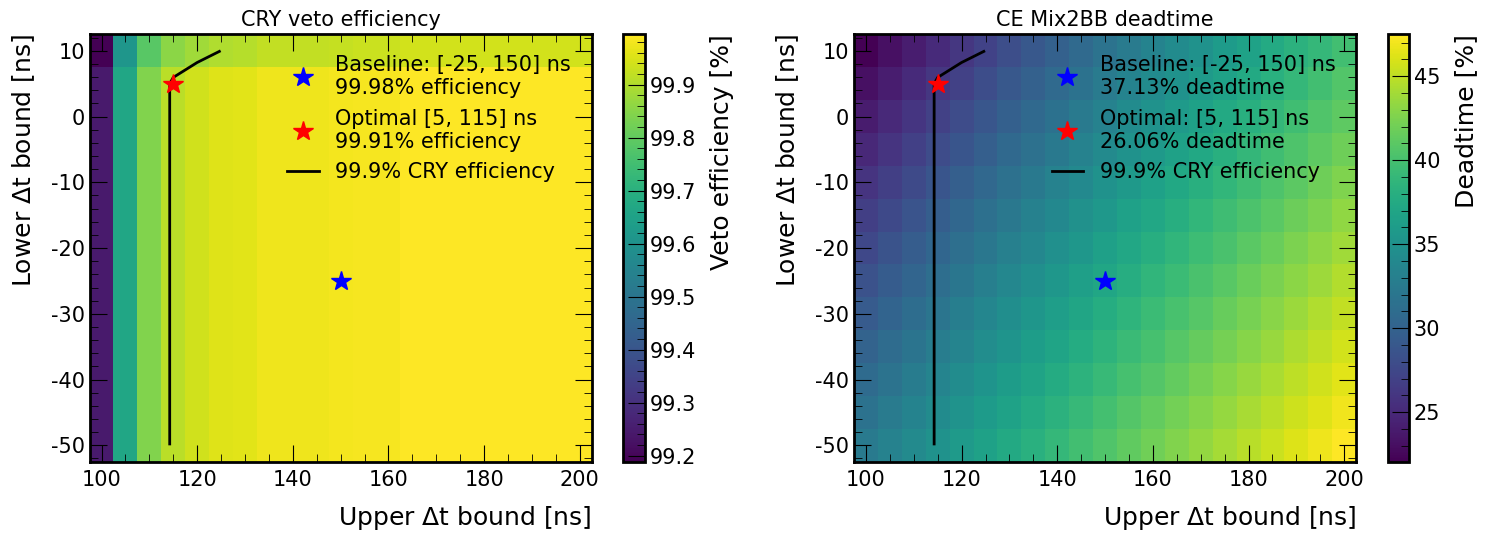

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(1.2*6.4*2, 1.2*4.8))

# CRY veto efficiency
pivot_cry = df_scan.pivot(index='dt_min', columns='dt_max', values='eff_cry')
im1 = axes[0].pcolormesh(pivot_cry.columns, pivot_cry.index, pivot_cry.values, cmap='viridis')
contour_cry = axes[0].contour(pivot_cry.columns, pivot_cry.index, pivot_cry.values, levels=[99.9], colors='black', linewidths=2)
axes[0].set_xlabel(r'Upper $\Delta t$ bound [ns]')
axes[0].set_ylabel(r'Lower $\Delta t$ bound [ns]')
axes[0].set_title('CRY veto efficiency')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Veto efficiency [%]')
axes[0].plot(150, -25, marker='*', color="blue", markersize=15, linestyle='none', label=f'Baseline: [-25, 150] ns\n{baseline["eff_cry"]:.2f}% efficiency')
axes[0].plot(optimal['dt_max'], optimal['dt_min'], marker='*', color='red', markersize=15, linestyle='none', label=f'Optimal [{optimal["dt_min"]:.0f}, {optimal["dt_max"]:.0f}] ns\n{optimal["eff_cry"]:.2f}% efficiency')
axes[0].plot([], [], 'k-', linewidth=2, label='99.9% CRY efficiency')
axes[0].legend(loc="best")


# CE Mix2BB deadtime
pivot_mix = df_scan.pivot(index='dt_min', columns='dt_max', values='eff_mix')
im2 = axes[1].pcolormesh(pivot_mix.columns, pivot_mix.index, pivot_mix.values, cmap='viridis')
contour_mix = axes[1].contour(pivot_cry.columns, pivot_cry.index, pivot_cry.values, levels=[99.9], colors='black', linewidths=2)
axes[1].set_xlabel(r'Upper $\Delta t$ bound [ns]')
axes[1].set_ylabel(r'Lower $\Delta t$ bound [ns]')
axes[1].set_title('CE Mix2BB deadtime')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('Deadtime [%]')
axes[1].plot(150, -25, marker='*', color="blue", markersize=15, linestyle='none', label=f'Baseline: [-25, 150] ns\n{baseline["eff_mix"]:.2f}% deadtime')
axes[1].plot(optimal['dt_max'], optimal['dt_min'], marker='*', color='red', markersize=15, linestyle='none', label=f'Optimal: [{optimal["dt_min"]:.0f}, {optimal["dt_max"]:.0f}] ns\n{optimal["eff_mix"]:.2f}% deadtime')
axes[1].plot([], [], 'k-', linewidth=2, label='99.9% CRY efficiency')
axes[1].legend(loc="best")

plt.tight_layout()

img_base_path = Path(f"../../output/images/dt/{run}")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name = img_base_path / "h2_1x2_dt_eff_deadtime.png" 
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/a/h1_1x2_dT.png
	Wrote ../../output/images/dt/a/h1_1x2_dT.png


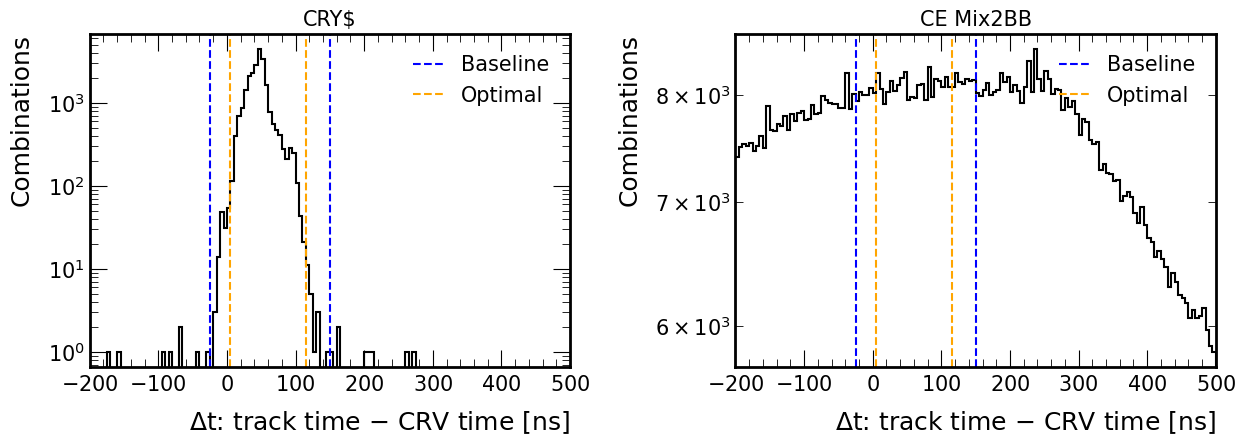

In [ ]:
plotter = Plot()

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# CRY distribution
plotter.plot_1D( 
    df_cry['dT'].values,
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CRY",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

# CE Mix2BB distribution
plotter.plot_1D( 
    df_ce_mix['dT'].values,
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CE Mix2BB",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    # Baseline
    subplot.axvline(-25, linestyle="--", color="blue", label="Baseline")
    subplot.axvline(150, linestyle="--", color="blue")
    # Optimal
    subplot.axvline(optimal['dt_min'], linestyle="--", color="orange", label="Optimal")
    subplot.axvline(optimal['dt_max'], linestyle="--", color="orange")
    subplot.legend()

plt.tight_layout()
out_name = img_base_path / "h1_1x2_dT.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()


[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/a/h1_dT_centdT_overlay.png
	Wrote ../../output/images/dt/a/h1_dT_centdT_overlay.png


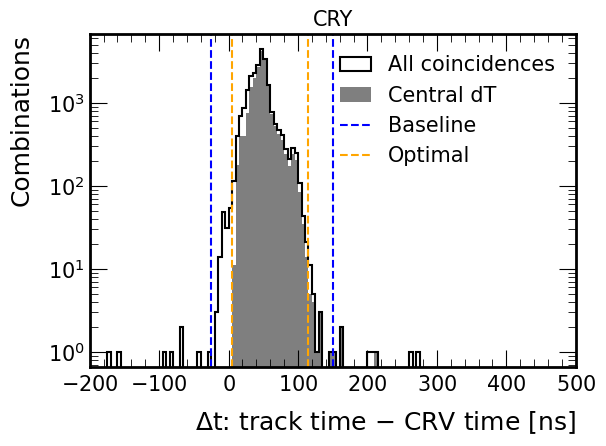

In [177]:
plotter = Plot()

# Get central dT for CRY (one per event - closest to window center)
window_center = (optimal['dt_min'] + optimal['dt_max']) / 2
df_cry['dist_to_center'] = np.abs(df_cry['dT'] - window_center)
central_dt_cry = df_cry.loc[df_cry.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT'].values

fig, ax = plt.subplots() 

styles = {
    "All coincidences": {
        "color" : "black",
        "histtype" : "step"
    },
    "Central dT": {
        "color" : "black",
        "alpha" : 0.5,
        "histtype" : "stepfilled"
    }
}
# CRY: overlay all dT and central dT
plotter.plot_1D_overlay(
    {
        "All coincidences": df_cry['dT'].values,
        "Central dT": central_dt_cry,
    },
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CRY",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    ax=ax,
    log_y=True,
    styles=styles
)


# Baseline
ax.axvline(-25, linestyle="--", color="blue", label="Baseline")
ax.axvline(150, linestyle="--", color="blue")
# Optimal
ax.axvline(optimal['dt_min'], linestyle="--", color="orange", label="Optimal")
ax.axvline(optimal['dt_max'], linestyle="--", color="orange")
ax.legend()

plt.tight_layout()
out_name = img_base_path / "h1_dT_centdT_overlay.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()


## Find events between -25 and 0 ns 

In [36]:
df_cry.groupby(['event', 'subrun'])
print(df_cry)

          event   subrun     run         dT        crv_x        crv_y  \
entry                                                                   
0      430241.0     95.0  1202.0  95.651870   563.356934  2706.025391   
1      242861.0    303.0  1202.0  45.393533   625.652161  2710.683838   
2      251404.0    335.0  1202.0  52.221441  -458.316559  2708.178223   
3      424207.0    397.0  1202.0  84.638133 -1663.167480  2714.258301   
4      172343.0    886.0  1202.0  78.270693 -1180.485352  2704.240234   
...         ...      ...     ...        ...          ...          ...   
21958  121931.0  78284.0  1202.0  50.039367 -2042.981934  2703.090088   
21959  267113.0  78284.0  1202.0  31.797607 -2585.625244  -777.748291   
21960  267113.0  78284.0  1202.0  51.724243  2592.519043  1694.798462   
21961     848.0  78367.0  1202.0  78.680327 -1651.353027  2688.950195   
21962  370290.0  78466.0  1202.0  49.880037  2584.940674  2304.469482   

             crv_z          PEs  nHits  nLayers  .

In [18]:
cry_lo = cry_data[(cry_data['dT'] > -25) & (cry_data['dT'] < 0)] 

In [31]:
df = ak.to_dataframe(cry_lo)

In [32]:
# df.head()
df.to_csv("test.csv", index=False) 

In [33]:
condition = ((cry_data['dT'] < 0) & (cry_data['dT'] > -25))
condition2 = ak.any(condition, axis=-1)
condition2  

np.True_

In [13]:
ak.any(((cry_data['dT'] < 0) & (cry_data['dT'] > -25)), axis=-1)

np.True_

## Filter events with dT in [-25, 0] range

Create a DataFrame per unique event that contains all dTs for events where at least one dT falls in the range [-25, 0].

In [41]:
# Filter events that have at least one dT in the range [-25, 0]
# Work with the DataFrame (df_cry) which has event, subrun, dT columns

# Find (event, subrun) pairs that have at least one dT in the target range
dt_in_range_mask = (df_cry['dT'] < 0) & (df_cry['dT'] > -25)
events_with_target_dt = df_cry.loc[dt_in_range_mask, ['event', 'subrun']].drop_duplicates()

# Merge back to get all rows for those events (all dTs for each qualifying event)
df_filtered = df_cry.merge(events_with_target_dt, on=['event', 'subrun'], how='inner')

print(f"Original coincidences: {len(df_cry):,}")
print(f"Unique events in original: {df_cry.groupby(['event', 'subrun']).ngroups:,}")
print(f"\nEvents with at least one dT in [-25, 0]: {len(events_with_target_dt):,}")
print(f"Total coincidences for filtered events: {len(df_filtered):,}")

Original coincidences: 21,963
Unique events in original: 18,645

Events with at least one dT in [-25, 0]: 85
Total coincidences for filtered events: 177


In [43]:
# Create a DataFrame with one row per event, containing all dTs as an array
df_events = df_filtered.groupby(['event', 'subrun'])['dT'].apply(list).reset_index()
df_events.columns = ['event', 'subrun', 'dT_array']

print(f"DataFrame with {len(df_events)} events")
print(df_events.head(10))

DataFrame with 85 events
     event   subrun                                           dT_array
0   4117.0  80884.0           [11.510548856916785, -8.214670869645715]
1  20836.0  17268.0            [9.357603993558541, -8.716004404878959]
2  28102.0  37133.0           [13.778081191182764, -7.575373398660986]
3  30313.0  48093.0          [-10.697883886910404, 17.287467675589596]
4  38307.0  62391.0            [16.89957069669549, -7.041591412679509]
5  46504.0  52461.0  [54.466524170543266, -15.954374266956734, 11.1...
6  49017.0  28882.0           [-11.383291594609773, 9.369760163202727]
7  50015.0  41264.0           [-2.1776541468939286, 25.56050503279357]
8  56175.0  30541.0            [-11.47414118451752, 16.63071721391998]
9  64533.0  39850.0           [-5.954539643689486, 19.671558989123014]


In [45]:
df_events.to_csv("filtered_events_dT.csv", index=False)